In [20]:
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
# data = np.load('/Users/maciej.filanowicz/DefyingCommonSense/data/SP-train.npy', allow_pickle=True)
data = np.load('/Users/maciej.filanowicz/DefyingCommonSense/data/WP-train.npy', allow_pickle=True)

data = list(data)

In [22]:
import nltk
from nltk.tokenize import word_tokenize
import string

# Make sure to download the NLTK punkt tokenizer for the first time
# nltk.download('punkt')

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def common_words(text1, text2):
    # Tokenize and convert to lower case
    words1 = word_tokenize(remove_punctuation(str(text1).lower()))
    words2 = word_tokenize(remove_punctuation(str(text2).lower()))
    # Find common words using set intersection
    common = set(words1).intersection(words2)
    return common, len(common)

In [24]:
common_words_counts = {  'answer': [], 
  'distractor1': [],
  'distractor2': [],
  'distractor(unsure)': []}
for sample in data:
    for key in common_words_counts.keys():
        common, num_common = common_words(sample["question"], sample[key])
        common_words_counts[key].append(num_common)


array([[<Axes: title={'center': 'answer'}>,
        <Axes: title={'center': 'distractor1'}>],
       [<Axes: title={'center': 'distractor2'}>,
        <Axes: title={'center': 'distractor(unsure)'}>]], dtype=object)

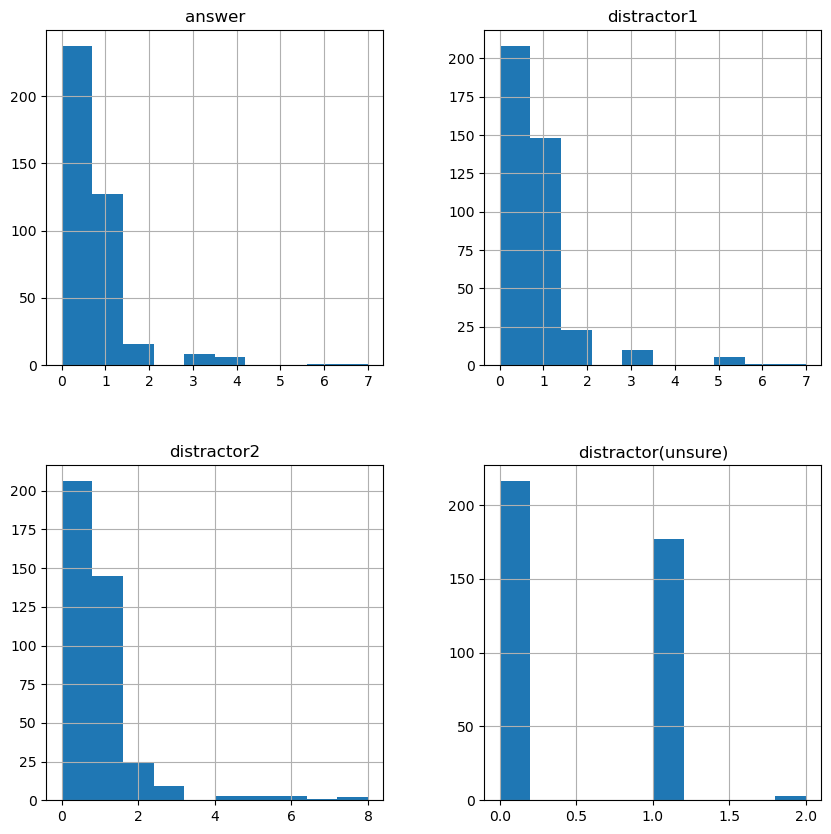

In [25]:
pd.DataFrame(common_words_counts).hist(backend='matplotlib', figsize=(10,10))

In [28]:
token_counts = {
  'question': [],
  'answer': [], 
  'distractor1': [],
  'distractor2': [],
  'distractor(unsure)': []}
for sample in data:
    for key in token_counts.keys():
        tokens = word_tokenize(remove_punctuation(str(sample[key]).lower()))
        token_counts[key].append(len(tokens))

array([[<Axes: title={'center': 'question'}>,
        <Axes: title={'center': 'answer'}>],
       [<Axes: title={'center': 'distractor1'}>,
        <Axes: title={'center': 'distractor2'}>],
       [<Axes: title={'center': 'distractor(unsure)'}>, <Axes: >]],
      dtype=object)

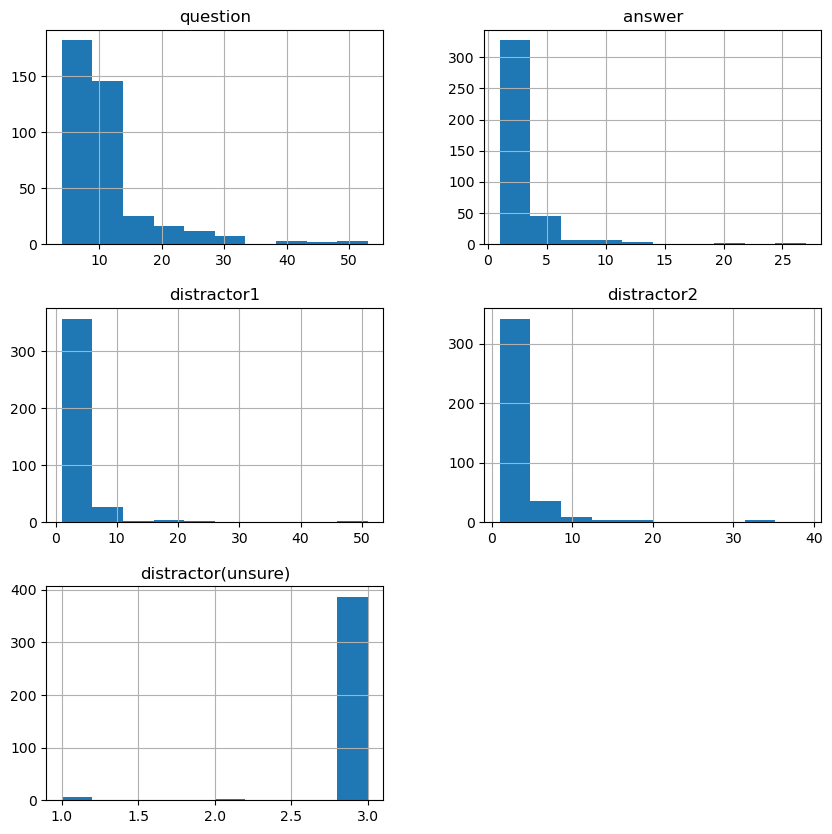

In [31]:
pd.DataFrame(token_counts).hist(backend='matplotlib', figsize=(10,10))

In [30]:
pd.DataFrame(token_counts).corr()

,question,answer,distractor1,distractor2,distractor(unsure)
question,1.000000,0.246829,0.193825,0.258405,-0.297485
answer,0.246829,1.000000,0.713822,0.689782,-0.096496
distractor1,0.193825,0.713822,1.000000,0.846295,0.060971
distractor2,0.258405,0.689782,0.846295,1.000000,-0.041000
distractor(unsure),-0.297485,-0.096496,0.060971,-0.041000,1.000000


In [58]:
import numpy as np

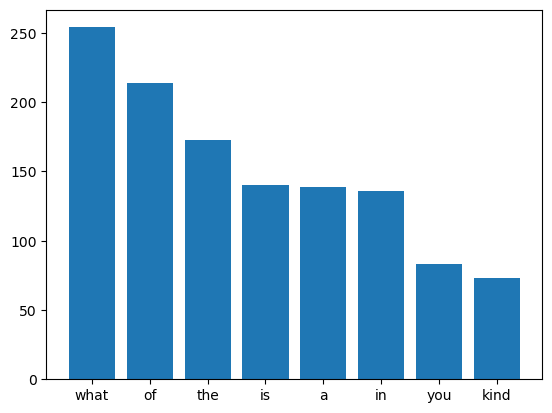

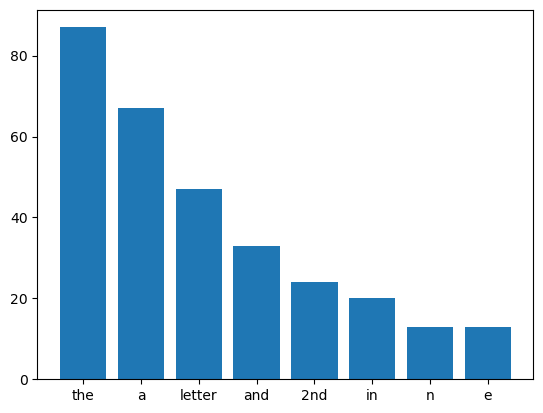

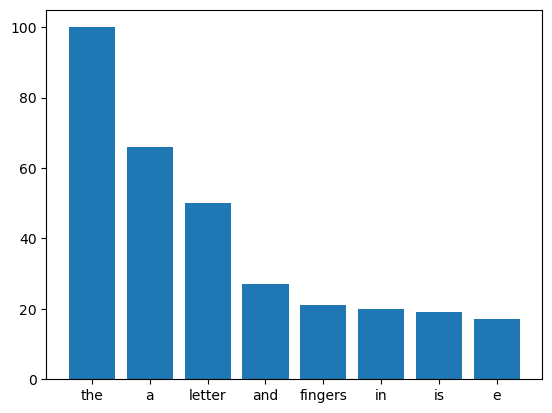

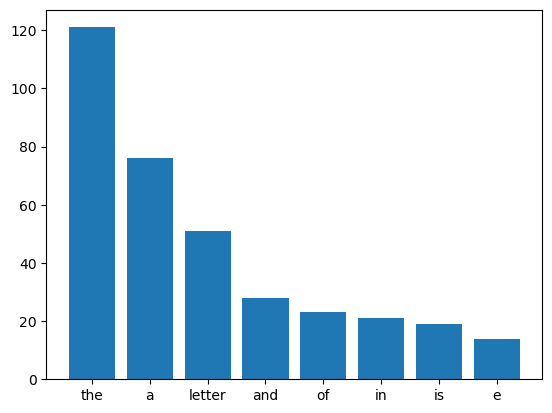

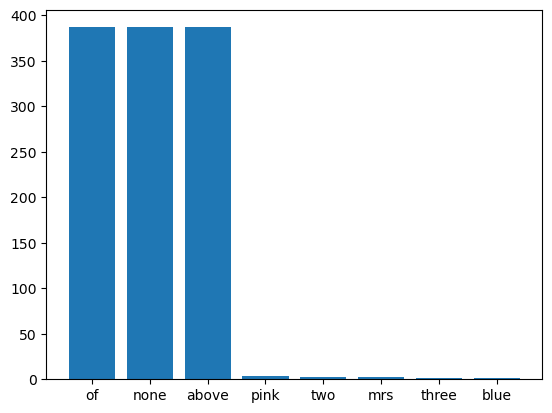

In [64]:
all_tokens = { 
      'question': [],
    'answer': [], 
  'distractor1': [],
  'distractor2': [],
  'distractor(unsure)': []
}
for sample in data:
    for key in token_counts.keys():
        tokens = word_tokenize(remove_punctuation(str(sample[key]).lower()))
        all_tokens[key] += tokens
for key in token_counts.keys():
    unique, counts = np.unique(all_tokens[key], return_counts=True)
    order = counts.argsort()[::-1]
    unique = unique[order][:8]
    counts = counts[order][:8]
    plt.bar(unique, counts)
    plt.show()


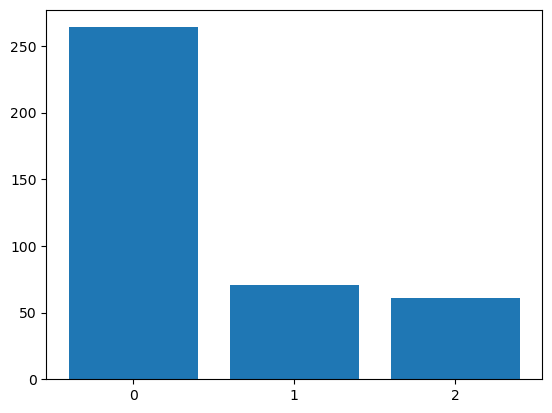

In [65]:
positions = [x['choice_order'].index(x['label']) for x in data]
unique, counts = np.unique(positions, return_counts=True)
plt.xticks(np.arange(min(unique), max(unique)+1, 1.0))
plt.bar(unique, counts)
plt.show()

In [69]:
unsure = []
for sample in data:
    unsure.append(sample['choice_list'][sample['label']] == 'None of above.')
np.count_nonzero(unsure)

9